In [1]:
# Data Manipulation Libraries
import pandas as pd 
import numpy as np

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week10\\Data\\BrentOilPrices.csv',low_memory=False)

<h1>Overview of the Data:</h1>

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [4]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [5]:
data.shape

(9011, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

# Sort the data by date
data = data.sort_values(by='Date')

# Reset index after sorting
data.reset_index(drop=True, inplace=True)

In [8]:
# Basic Statistics:
basic_statistics = data.describe()
print(basic_statistics)

                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


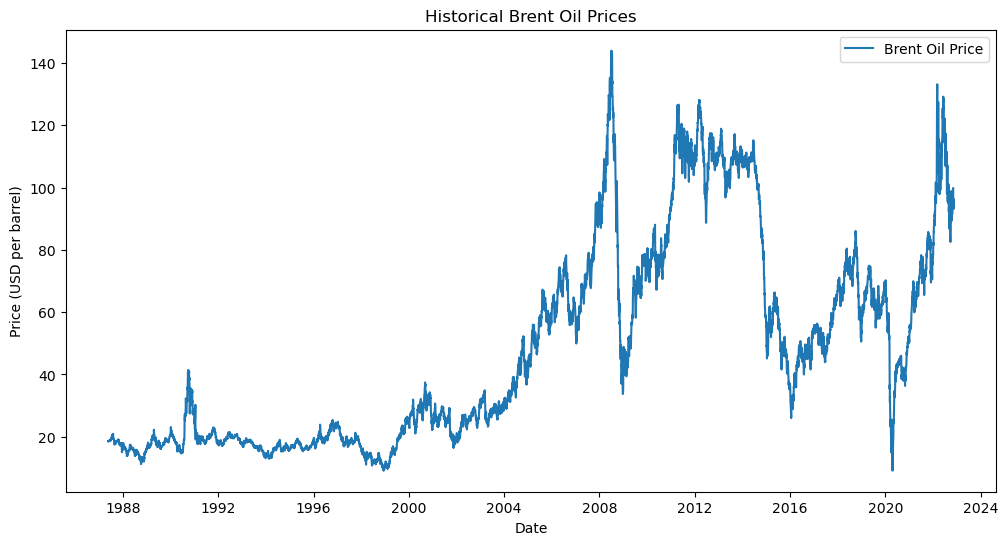

In [9]:
# Plot the time series data to identify trends and patterns:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()

<h1>Additinal Models for Analysis</h1>

<h2>VAR</h2>

In [11]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit BVAR model
model = VAR(data[['Price', 'GDP', 'Inflation']])
bvar_result = model.fit(maxlags=5)

# Forecast
forecast = bvar_result.forecast(steps=30)

# Plot BVAR forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Observed')
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=30, freq='D'), forecast[:, 0], label='Forecast')
plt.title('BVAR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

KeyError: "['GDP', 'Inflation'] not in index"

<h2>GARCH</h2>

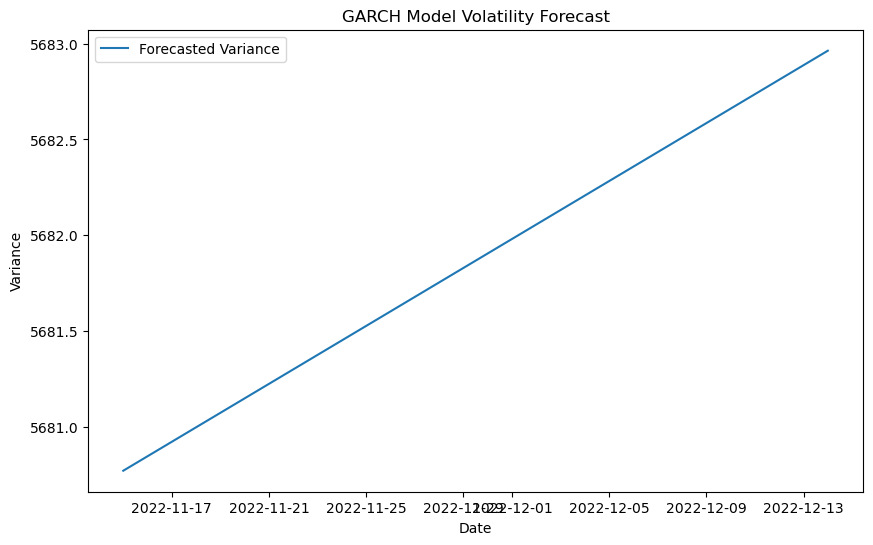

OSError: Cannot save file into a non-existent directory: '..\Results\garch'

In [13]:
from arch import arch_model

# Fit GARCH model
model = arch_model(data['Price'], vol='Garch', p=1, q=1)
garch_result = model.fit(disp='off')

# Forecast volatility
forecast_horizon = 30
volatility_forecast = garch_result.forecast(horizon=forecast_horizon)

# Extract forecasted variance and dates
forecasted_variance = volatility_forecast.variance.values[-1]  # Last forecasted variance
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=forecast_horizon + 1, freq=data['Date'].iloc[1] - data['Date'].iloc[0])

# Plot volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates[1:], forecasted_variance, label='Forecasted Variance')
plt.title('GARCH Model Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Save results to CSV
forecast_df = pd.DataFrame({'Date': forecast_dates[1:], 'Forecasted_Variance': forecasted_variance})
forecast_df.to_csv('../Results/garch/forecast.csv', index=False)